# Semantic Segmentation (regimes) with arc curves # 
“arc curve” annotates the raw time series with information about the likelihood of a regime change.

https://stumpy.readthedocs.io/en/latest/Tutorial_Semantic_Segmentation.html

https://sites.google.com/site/onlinesemanticsegmentation/

In [1]:
# SETUP
import stumpy
import helper.testdata as testdata
import helper.visualize as visualize
import helper.results as results

## TiltABP_210_25000 (Hemodynamics Data) ##

In [2]:
# SETUP
use_case = "segmentation"
data_name = "TiltABP_210_25000"
T = testdata.load_from_txt("../data/" + use_case + "/" + data_name + ".txt")

### stumpy without dilation ###

In [3]:
# SETUP for stumpy without dilation
m = 210 # target for ABP
d = 1
L = m
n_regimes = 2
excl_factor = 1

file_name = data_name + "_d" + str(d) + "_m" + str(m) + "_L" + str(L) + "_nregimes" + str(n_regimes) + "_exclfactor" + str(excl_factor)
file_path = "../results/" + use_case + "/" + data_name + "/" + file_name


In [4]:
# calculate:
mp = stumpy.stump(T, m=m)
cac, regime_locations = stumpy.fluss(mp[:, 1], L=L, n_regimes=n_regimes, excl_factor=excl_factor)
results.save([T, m, d, L, n_regimes, excl_factor, mp, cac, regime_locations], file_path + ".npy")

/vol/fob-vol3/mi20/hirschmi/mp_dilation_master/experiments_master_mp_dilation/usecases/helper/results.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.array(np_arrays)


[24906]


<Figure size 1600x400 with 0 Axes>

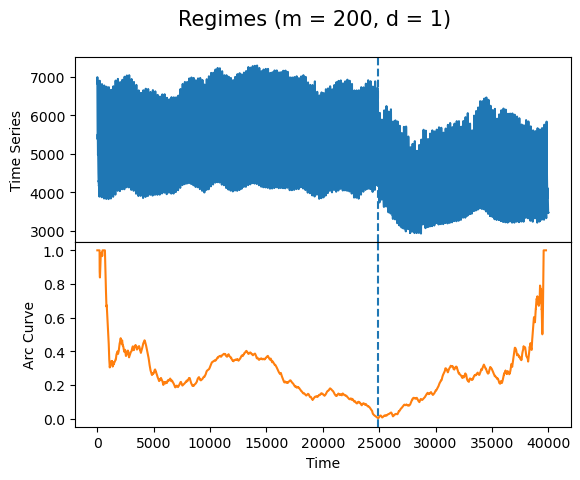

In [5]:
# visualize:
T, m, d, L, n_regimes, excl_factor, mp, cac, regime_locations = results.load(file_path + ".npy")
print(regime_locations)
plot = visualize.segmentation_regimecac(T, m, d, L, n_regimes, excl_factor, mp, cac, regime_locations)
plot.savefig(file_path + "_regimecac")
# plot = visualize.chain_regimecac_snippets(T, m, d, L, n_regimes, excl_factor, mp, cac, regime_locations)
# plot.savefig(file_path + "_regimecac_snippets")
# TODO mit MP und CAC und TIme Series dazu visualisieren

### stumpy with dilation ###

In [6]:
# SETUP for stumpy with dilation
target_w = 200 # target for ABP
ds = [2,3,4,5,6,7,8]

In [7]:
# calculate:
for d in ds:
    m = round((target_w-1)/d) + 1
    file_name = data_name + "_d" + str(d) + "_m" + str(m) + "_L" + str(L) + "_nregimes" + str(n_regimes) + "_exclfactor" + str(excl_factor)
    file_path = "../results/" + use_case + "/" + data_name + "/" + file_name

    mp = stumpy.stump_dil(T, m=m, d=d)
    cac, regime_locations = stumpy.fluss(mp[:, 1], L=L, n_regimes=n_regimes, excl_factor=excl_factor)

    results.save([T, m, d, L, n_regimes, excl_factor, mp, cac, regime_locations], file_path + ".npy")

/vol/fob-vol3/mi20/hirschmi/mp_dilation_master/stumpy_master_mp_dilation/stumpy/core.py:67: UserWarning: Excluding `['normalize', 'p']` parameters, function `stump_dil(['T_A', 'm', 'T_B', 'ignore_trivial', 'k', 'd']) and function `aamp(['T_A', 'm', 'T_B', 'ignore_trivial', 'k']) have different arguments/parameters.
  warnings.warn(msg)
/vol/fob-vol3/mi20/hirschmi/mp_dilation_master/experiments_master_mp_dilation/usecases/helper/results.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.array(np_arrays)
/vol/fob-vol3/mi20/hirschmi/mp_dilation_master/stumpy_master_mp_dilation/stumpy/core.py:67: UserWarning: Excluding `['normalize', 'p']` parameters, function `stump_dil(['T_A', 'm', 'T_B', 'ignore_trivial', 'k', 'd']) and function `aamp(['T_A', 'm', 'T_B', '

[24906]
[24907]
[24907]
[24907]
[24908]
[24908]
[24909]


<Figure size 1600x400 with 0 Axes>

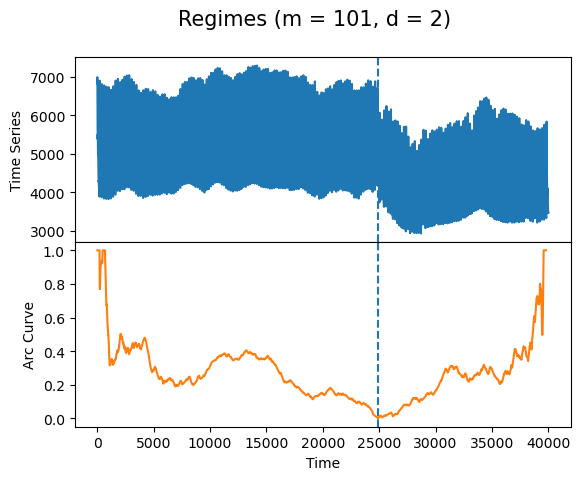

<Figure size 1600x400 with 0 Axes>

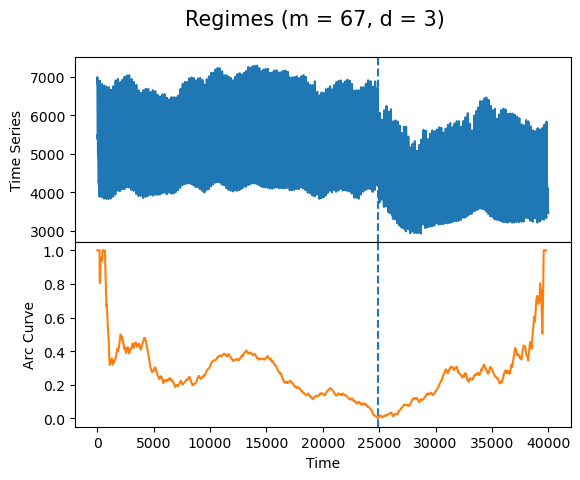

<Figure size 1600x400 with 0 Axes>

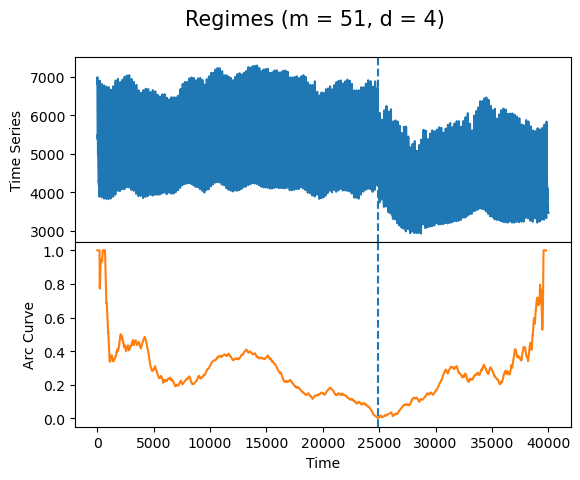

<Figure size 1600x400 with 0 Axes>

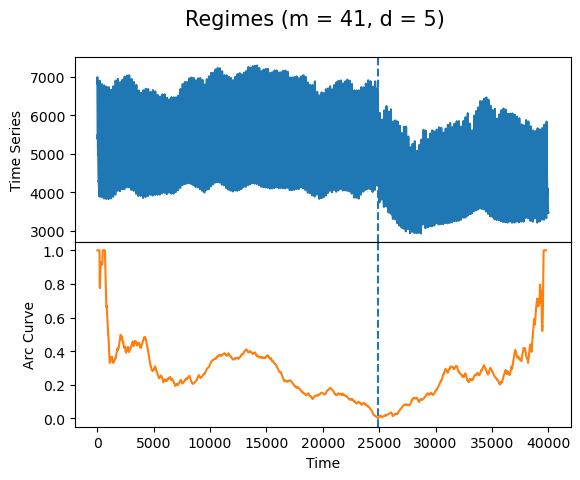

<Figure size 1600x400 with 0 Axes>

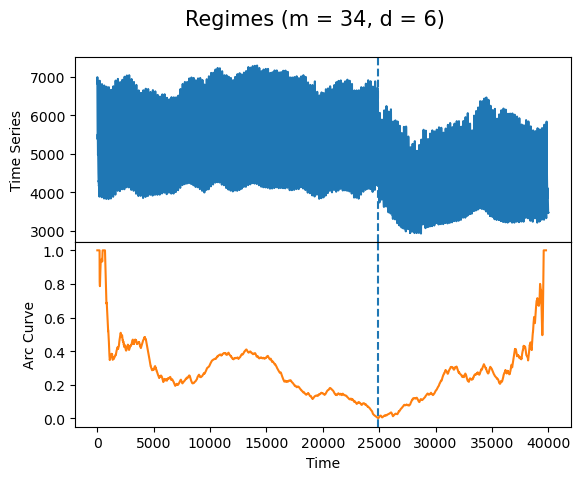

<Figure size 1600x400 with 0 Axes>

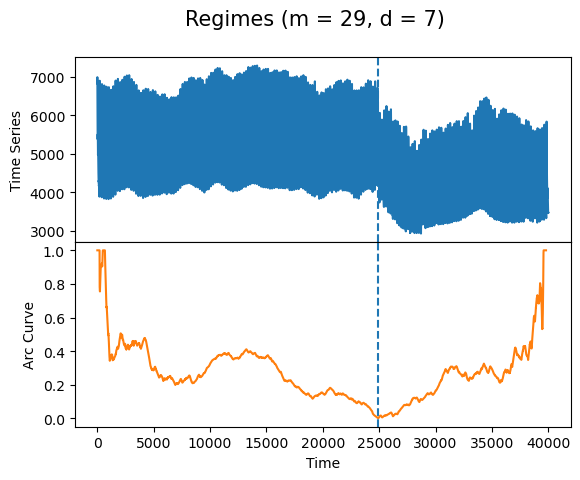

<Figure size 1600x400 with 0 Axes>

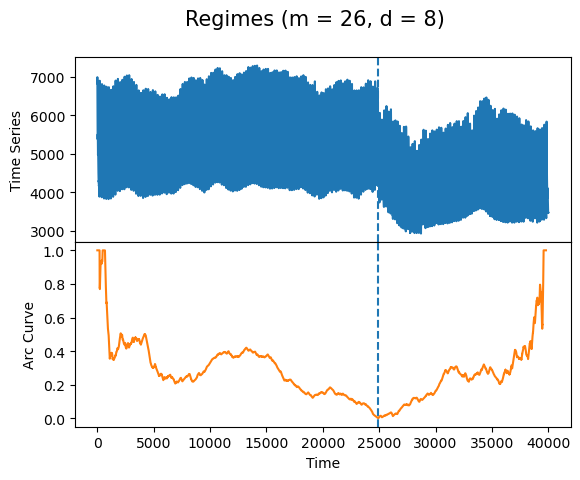

In [8]:
# visualize:
for d in ds:
    m = round((target_w-1)/d) + 1
    file_name = data_name + "_d" + str(d) + "_m" + str(m) + "_L" + str(L) + "_nregimes" + str(n_regimes) + "_exclfactor" + str(excl_factor)
    file_path = "../results/" + use_case + "/" + data_name + "/" + file_name

    T, m, d, L, n_regimes, excl_factor, mp, cac, regime_locations = results.load(file_path + ".npy")

    print(regime_locations)
    plot = visualize.segmentation_regimecac(T, m, d, L, n_regimes, excl_factor, mp, cac, regime_locations)
    plot.savefig(file_path + "_regimecac")
    # plot = visualize.chain_regimecac_snippets(T, m, d, L, n_regimes, excl_factor, mp, cac, regime_locations)
    # plot.savefig(file_path + "_regimecac_snippets")
    # TODO mit MP dazu visualisieren?